# ISM Homework 3
> b12501031 高紫恩


Numerical results for n_H = 1 cm^-3:
T =    30 K: n1/n0 = 0.000026
T =   100 K: n1/n0 = 0.000254
T =   300 K: n1/n0 = 0.000542
T =  1000 K: n1/n0 = 0.000811
T =  3000 K: n1/n0 = 0.001047
T = 10000 K: n1/n0 = 0.001357


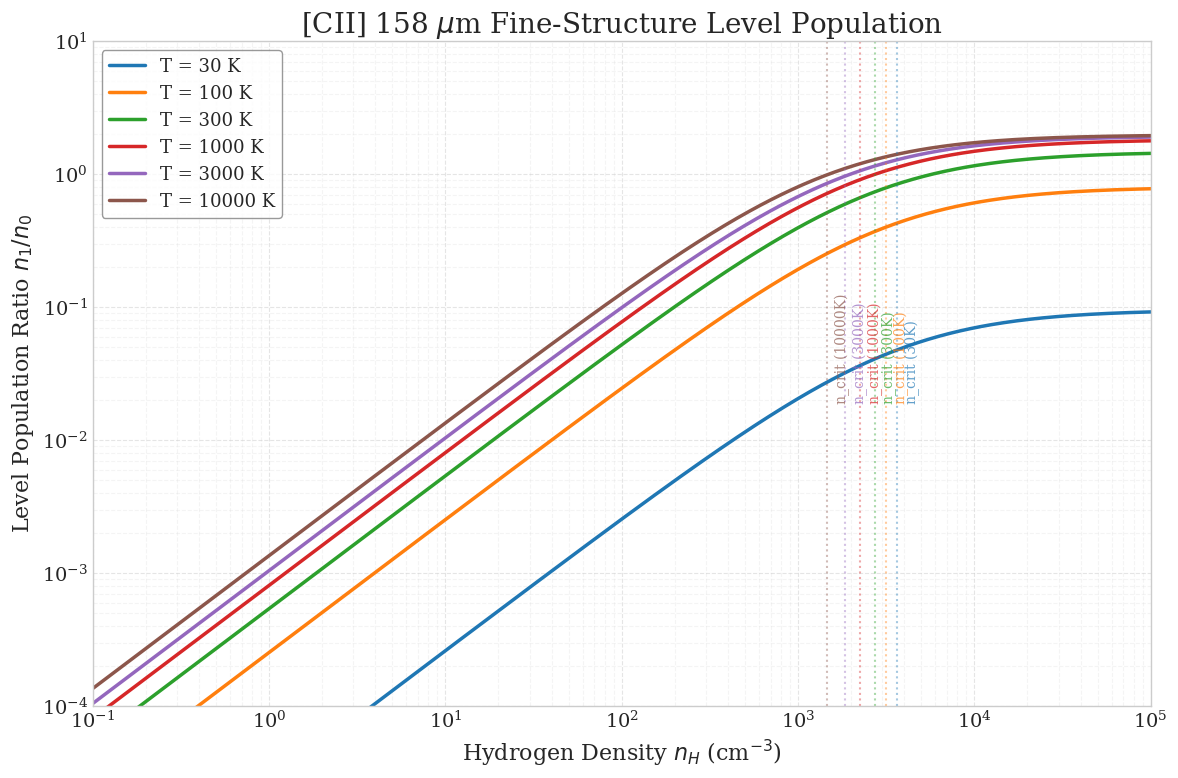

In [2]:
# [CII] 158 $\mu$m Fine-Structure Line Level Population
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import root
from scipy import constants as const

plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.linestyle'] = '--'

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

k_B = const.k * 1e7  # Boltzmann constant (erg/K)
h = const.h * 1e7  # Planck constant (erg⋅s)
c = const.c * 1e2  # Speed of light (cm/s)
g_0 = 2  # Statistical weight of the ground state (2P_1/2)
g_1 = 4  # Statistical weight of the excited state (2P_3/2)
E_10 = 91.21 * k_B  # Energy difference (erg)
A_10 = 2.4e-6  # Einstein A coefficient (s^-1)
wavelength = 157.74  # Wavelength in microns

def compute_CII_level_population(n_H, T):
    """
    n_1/n_0 = (n_e k_01) / (n_e k_10 + A_10)
    k_01 = (g_1/g_0) k_10 e^(-E_10/kT)
    H atoms: k_10(H) = 7.58 × 10^-10 T_2^0.1281+0.0087ln(T_2) cm^3 s^-1
    """
    T_2 = np.maximum(T / 100.0, 1e-10)
    k_10_H = 7.58e-10 * T_2**(0.1281 + 0.0087 * np.log(T_2))
    k_01_H = (g_1 / g_0) * k_10_H * np.exp(-E_10 / (k_B * T)) # detailed balance
    ratio = (n_H * k_01_H) / (n_H * k_10_H + A_10) # assuming n_e = 0, only H collisions
    return ratio

n_H_values = np.logspace(-1, 5, 500)  # hydrogen density range till 10^5 like the figure 17.4
temperatures = [30, 100, 300, 1000, 3000, 10000]  # K

# Calculate the ratio for each temperature
plt.figure(figsize=(12, 8))
for i, T in enumerate(temperatures):
    ratio = compute_CII_level_population(n_H_values, T)
    plt.loglog(n_H_values, ratio, label=f'T = {T} K', color=colors[i], linewidth=2.5)

# Add critical density markers (in a more subtle way)
for i, T in enumerate(temperatures):
    T_2 = T / 100.
    k_10_H = 7.58e-10 * T_2**(0.1281 + 0.0087 * np.log(T_2))
    n_crit = A_10 / k_10_H
    plt.axvline(n_crit, linestyle=':', color=colors[i], alpha=0.4)
    plt.text(n_crit*1.1, 0.02, f'n_crit ({T}K)', rotation=90, 
             alpha=0.7, fontsize=10, color=colors[i])

plt.xlabel(r'Hydrogen Density $n_H$ (cm$^{-3}$)')
plt.ylabel(r'Level Population Ratio $n_1/n_0$')
plt.title('[CII] 158 $\mu$m Fine-Structure Level Population', fontsize=20)
plt.grid(True, which="major", alpha=0.5)
plt.grid(True, which="minor", alpha=0.2)
plt.xlim(1e-1, 1e5)
plt.ylim(1e-4, 1e1)
plt.legend(frameon=True, facecolor='white', edgecolor='gray')
plt.tight_layout()
plt.savefig('cii_level_population_rev4.png', dpi=300, bbox_inches='tight')

# Print some numerical results
print("\nNumerical results for n_H = 1 cm^-3:")
for T in temperatures:
    ratio = compute_CII_level_population(1.0, T)
    print(f"T = {T:5d} K: n1/n0 = {ratio:.6f}")


python(23890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23897) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23898) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23899) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23900) Malloc

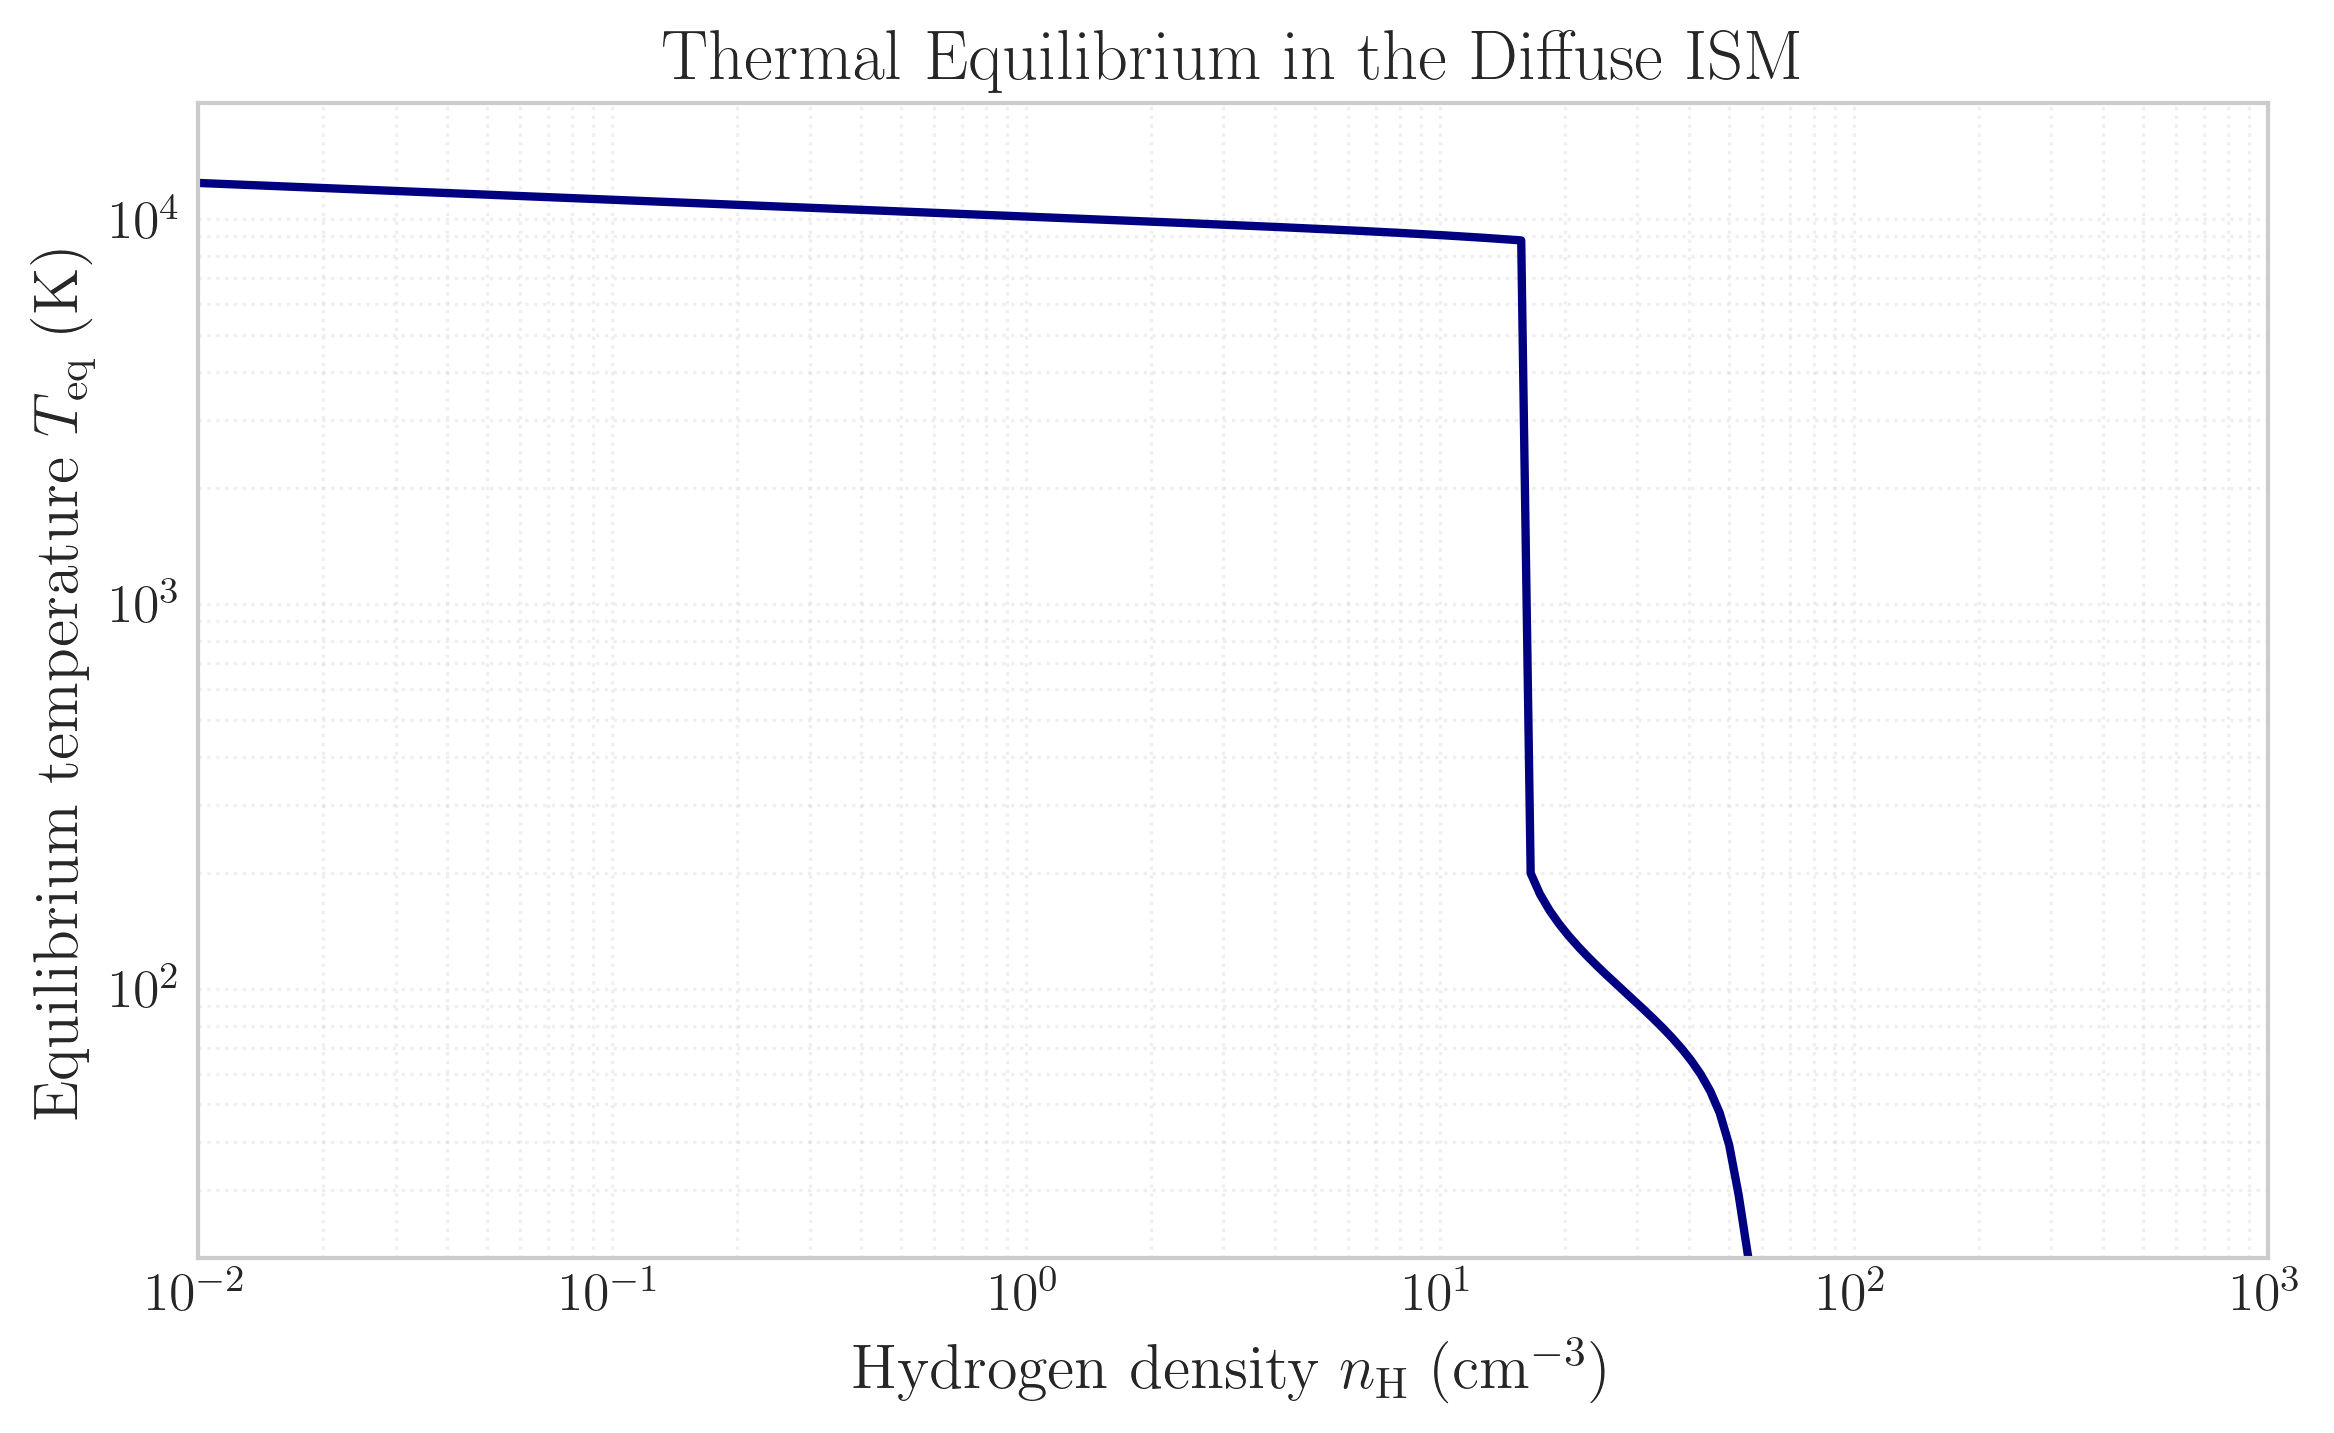

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ---------- 常數 ----------
k_B = 1.380649e-16        # erg K⁻¹
E_CII = k_B * 91.2        # erg
E_OI  = k_B * 228.0       # erg
A_CII = 2.3e-6            # s⁻¹
A_OI  = 8.9e-5            # s⁻¹
C_H   = 1.4e-4            # C/H
O_H   = 3.2e-4            # O/H
zeta  = 2.0e-16           # H‑ionization rate (X‑ray + cosmic ray)  s⁻¹
G0    = 1.7               # Draine ISRF scale factor

# ---------- 電子密度 ----------
def electron_density(nH, T):
    """x_e ≈ sqrt( zeta / (alpha_B n_H) )，下限為 C⁺ 電子"""
    alpha_B = 2.6e-13 * (T/1e4)**-0.7   # cm³ s⁻¹
    x_H = np.sqrt(zeta / (alpha_B * nH))
    return nH * np.maximum(C_H, x_H)

# ---------- 碰撞去激率 ----------
def q_CII_H(T):
    return 7.6e-10 * T**(0.13 + 0.009*np.log10(T))

def q_CII_e(T):
    return 3.8e-7 * T**-0.5          # Goldsmith+12; cm³ s⁻¹

def q_OI_H(T):
    return 8.0e-11 * T**0.67 * np.exp(-228./T)

def q_OI_e(T):
    return 1.0e-8 * T**-0.5          # appr. (Gražulis+)

# ---------- 加熱 ----------
def photoelectric_heating(nH, T):
    ne  = electron_density(nH, T)
    psi = G0 * np.sqrt(T) / (ne/1e-2)    # ne 以 cm⁻³
    eps = 0.049/(1+(psi/1925.)**0.73) + 0.037*(T/1e4)**0.7/(1+0.0002*psi)
    return 1.3e-24 * eps * G0 * nH       # erg s⁻¹ cm⁻³

def cosmic_ray_heating(nH):
    return 1.0e-27 * nH                  # erg s⁻¹ cm⁻³

# ---------- 冷卻 ----------
def cooling_CII(nH, T):
    nC = C_H * nH
    ne = electron_density(nH, T)
    kH, ke = q_CII_H(T), q_CII_e(T)
    ncrit_H = A_CII / kH
    ncrit_e = A_CII / ke
    # 加權臨界密度
    n_tot = nH + 1.7*ne          # e⁻ 的 collision strength 大，乘以 1.7 作近似
    frac = n_tot / (ncrit_H + ncrit_e)
    n1 = nC * frac / (1 + frac)
    return n1 * A_CII * E_CII

def cooling_OI(nH, T):
    nO = O_H * nH
    ne = electron_density(nH, T)
    kH, ke = q_OI_H(T), q_OI_e(T)
    ncrit_H = A_OI / kH
    ncrit_e = A_OI / ke
    n_tot = nH + 8.*ne
    frac = n_tot / (ncrit_H + ncrit_e)
    n1 = nO * frac / (1 + frac)
    return n1 * A_OI * E_OI

def cooling_Lya(nH, T):
    ne = electron_density(nH, T)
    if T < 6000.:     # 有效溫度門檻
        return 0.0
    return 7.5e-19 * ne * nH * np.exp(-118348./T)

def total_heating(nH, T):
    return photoelectric_heating(nH, T) + cosmic_ray_heating(nH)

def total_cooling(nH, T):
    return cooling_CII(nH, T) + cooling_OI(nH, T) + cooling_Lya(nH, T) + 1e-40

# ---------- 平衡溫度 ----------
def equilibrium_T(nH):
    f = lambda T: total_heating(nH, T) - total_cooling(nH, T)
    try:
        return brentq(f, 10., 2.5e4, xtol=1e-2)
    except ValueError:
        # fallback: 最接近平衡的點
        TT   = np.logspace(1, 4.4, 500)
        diff = np.abs([f(t) for t in TT])
        return TT[np.argmin(diff)]

# ---------- 掃描密度 ----------
nH_grid = np.logspace(-2, 3, 220)
T_eq = np.array([equilibrium_T(n) for n in nH_grid])

# ---------- 繪圖 ----------
plt.figure(figsize=(8,5))
plt.loglog(nH_grid, T_eq, lw=2, color='navy')
plt.xlabel(r'Hydrogen density $n_{\rm H}\;({\rm cm^{-3}})$')
plt.ylabel(r'Equilibrium temperature $T_{\rm eq}\;({\rm K})$')
plt.title('Thermal Equilibrium in the Diffuse ISM')
plt.grid(True, which='both', ls=':', alpha=0.3)
plt.xlim(1e-2, 1e3)
plt.ylim(20, 2e4)
plt.tight_layout()
plt.show()


In [84]:
# 2 phase ISM
pressure = n_H_range * k_B * T_eq # ideal gas law

from scipy.ndimage import gaussian_filter1d
log_n_H = np.log10(n_H_range)
log_P = np.log10(pressure)
dlogP_dlogn = np.gradient(gaussian_filter1d(log_P, sigma=1), log_n_H)
# smooth log P with Gaussian filter supress small fluctuations
# thermal instability occurs when dlogP/dlogn < 0
# Identify regions where pressure decreases with increasing density
unstable_regions = np.where(dlogP_dlogn < 0)[0]

plt.figure(figsize=(12, 8))
plt.loglog(n_H_range, pressure/k_B, linewidth=3, color=colors[0])  # Express as P/k_B in K cm^-3
plt.xlim(1e-2, 1e3)
plt.xlabel(r'Hydrogen Density $n_H$ (cm$^{-3}$)')
plt.ylabel(r'Pressure $P/k_B$ (K cm$^{-3}$)')
plt.title('Pressure vs. Density in the ISM', fontsize=20)
plt.grid(True, which="major", alpha=0.5)
plt.grid(True, which="minor", alpha=0.2)

if len(unstable_regions) > 0:
    # Find where the derivative changes sign (ends of unstable region)
    sign_changes = np.where(np.diff(np.sign(dlogP_dlogn)))[0]
    
    if len(sign_changes) >= 2:
        # Get the first and last sign change surrounding the unstable region
        # Extract corresponding pressures
        P_min, P_max = None, None
        for i in range(len(sign_changes) - 1):
            if sign_changes[i] < unstable_regions[0] < sign_changes[i+1]:
                P_min = pressure[sign_changes[i]] / k_B
                P_max = pressure[sign_changes[i+1]] / k_B
                break
        
        if P_min is None or P_max is None:
            P_min = min(pressure[unstable_regions[0]], pressure[unstable_regions[-1]]) / k_B
            P_max = max(pressure[unstable_regions[0]], pressure[unstable_regions[-1]]) / k_B
    else:
        P_min = min(pressure[unstable_regions[0]], pressure[unstable_regions[-1]]) / k_B
        P_max = max(pressure[unstable_regions[0]], pressure[unstable_regions[-1]]) / k_B
    
    if P_min > P_max:
        P_min, P_max = P_max, P_min
    
    plt.axhspan(P_min, P_max, alpha=0.2, color='red', label='Two-phase region')
    
    plt.text(0.5, 0.1, 
             f'Pressure range for two-phase medium:\n{P_min:.2e} - {P_max:.2e} K cm$^{{-3}}$',
             transform=plt.gca().transAxes, ha='center', bbox=dict(boxstyle="round,pad=0.3", 
                                                                  fc="white", ec="gray", alpha=0.8))
    
    print(f"\nPressure range allowing two stable phases: {P_min:.2e} - {P_max:.2e} K cm^-3")
else:
    print("\nNo thermally unstable region identified.")

plt.legend()
plt.tight_layout()
plt.savefig('two_phase_ism_rev1.png', dpi=300, bbox_inches='tight')

ValueError: operands could not be broadcast together with shapes (150,) (900,) 

python(23883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(23884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


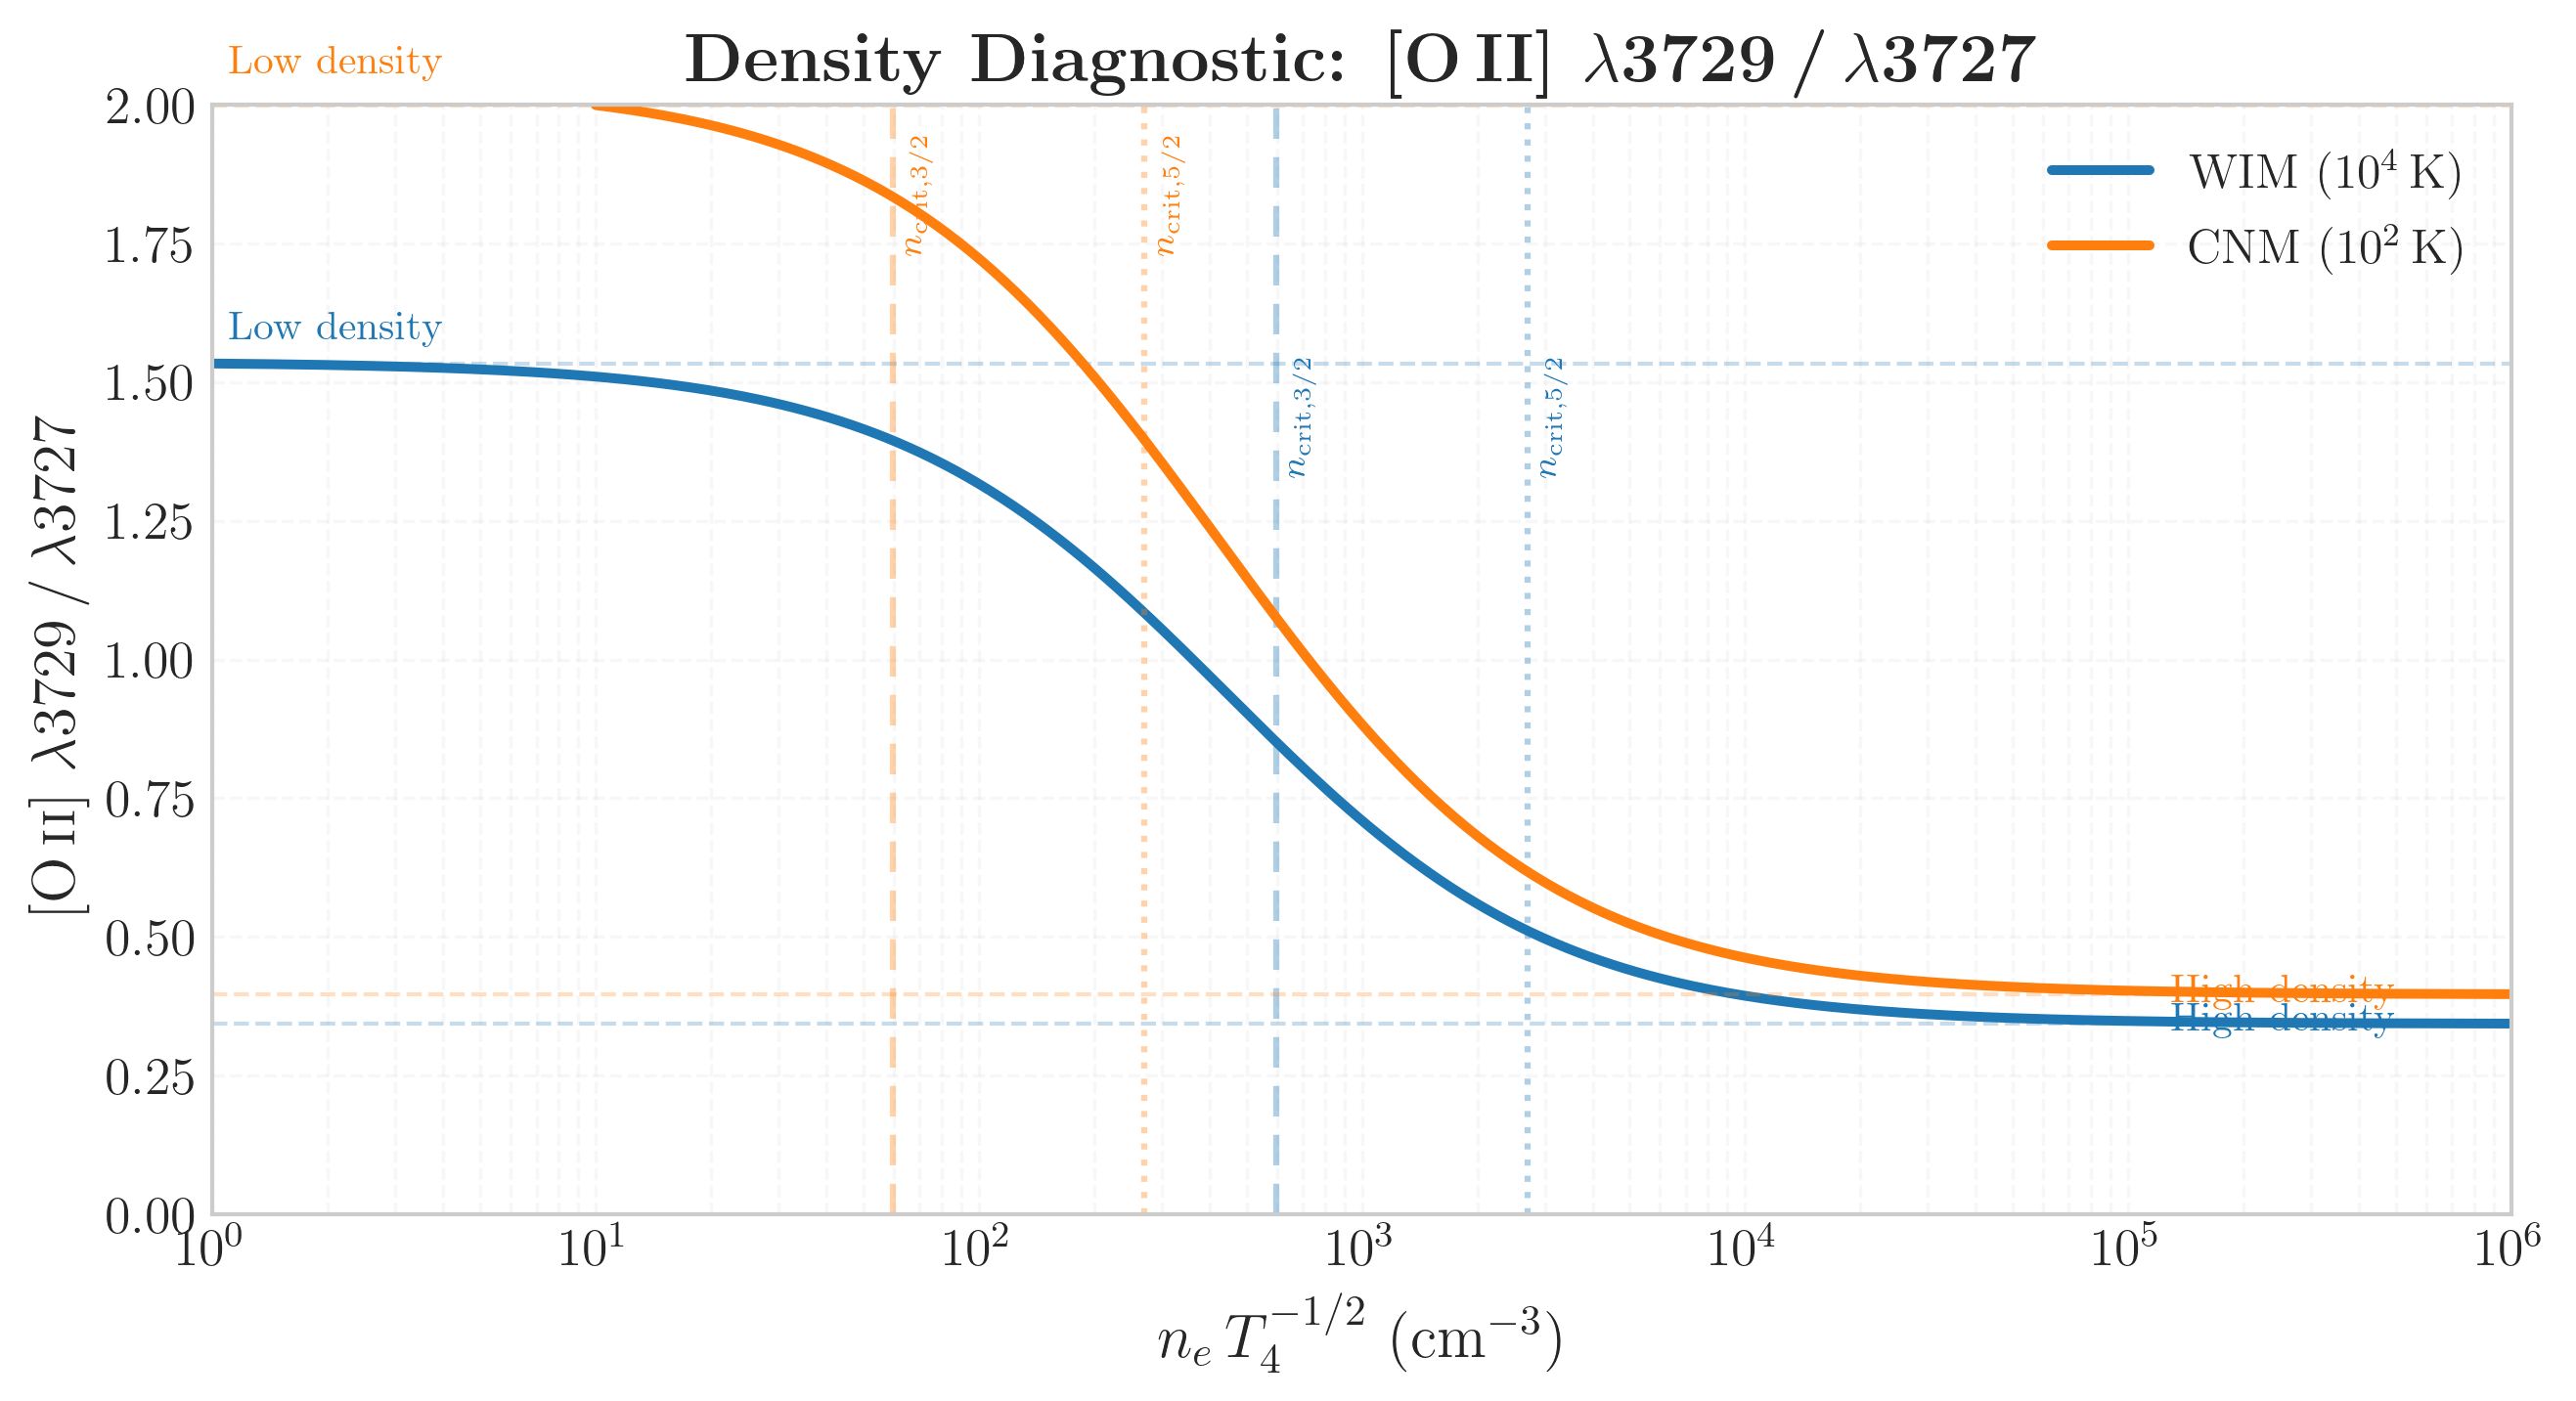

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ===== 1. rcParams =====
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,             # 若無 LaTeX 可設 False
    "axes.labelsize": 15,
    "axes.titlesize": 17,
    "legend.fontsize": 12,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "figure.dpi": 300,
})

# ===== 2. 物理常數與函式 (與前版相同) =====
hc_kB = 1.4387770e-2
λ27, λ29 = 3726.032e-10, 3728.815e-10
E_27, E_29 = hc_kB/λ27, hc_kB/λ29
ΔE = abs(E_29 - E_27)

A_27, A_29, A_21 = 3.50e-5, 1.80e-5, 1.10e-7
Ω_5_2, Ω_3_2, Ω_12 = 0.90, 1.40, 0.20

def k_down(g_u, Ω, T): return 8.629e-6 * Ω / (g_u * np.sqrt(T))

def OII_ratio(ne, T):
    g0, g1, g2 = 4, 6, 4
    k10 = k_down(g1, Ω_5_2, T);  k20 = k_down(g2, Ω_3_2, T); k21 = k_down(g2, Ω_12, T)
    k01 = (g1/g0)*k10*np.exp(-E_27/T); k02 = (g2/g0)*k20*np.exp(-E_29/T); k12 = (g2/g1)*k21*np.exp(-ΔE/T)
    R10 = ne*k10 + A_27; R20 = ne*k20 + A_29; R21 = ne*k21 + A_21
    denom = R10*R20 + R10*R21 + k12*ne*R20
    n1_n0 = (ne*k01*R20 + ne*k01*R21 + R21*ne*k02)/denom
    n2_n0 = (ne*k02*R10 + ne*k02*k12*ne + k12*ne*ne*k01)/denom
    return (n2_n0*A_29) / (n1_n0*A_27)

# ===== 3. 計算 =====
ne = np.logspace(0, 6, 400)
temps = [(1e4, r'WIM (10$^{4}$\,K)'), (100, r'CNM (10$^{2}$\,K)')]

fig, ax = plt.subplots(figsize=(9,5))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for idx, (T, label) in enumerate(temps):
    x   = ne / np.sqrt(T/1e4)
    y   = np.array([OII_ratio(n, T) for n in ne])
    ax.semilogx(x, y, lw=2.4, color=colors[idx], label=label)

    # 關鍵極限
    y_low, y_high = y[0], y[-1]
    ax.axhline(y_low , ls='--', lw=1.0, color=colors[idx], alpha=0.25)
    ax.axhline(y_high, ls='--', lw=1.0, color=colors[idx], alpha=0.25)

    ax.text(1.1, y_low*1.03,  r'$\mathrm{Low\ density}$', color=colors[idx], fontsize=10)
    ax.text(5e5, y_high*0.97, r'$\mathrm{High\ density}$', color=colors[idx], ha='right', fontsize=10)

    # 臨界密度
    ncrit_5_2 = A_27 / k_down(6, Ω_5_2, T)
    ncrit_3_2 = A_29 / k_down(4, Ω_3_2, T)
    for ncrit, ls, label_c in zip([ncrit_5_2, ncrit_3_2],[':', (0, (5,3))],['$n_{\mathrm{crit},5/2}$', '$n_{\mathrm{crit},3/2}$']):
        ax.axvline(ncrit, ls=ls, color=colors[idx], alpha=0.35)
        ax.text(ncrit*1.05, 1.55 if idx==0 else 1.95, label_c, rotation=90,
                color=colors[idx], fontsize=9, va='top')

# ===== 4. 軸標 & 格線 =====
ax.set_xlabel(r'$n_e\,T_4^{-1/2}$ (cm$^{-3}$)')
ax.set_ylabel(r'[O\,\textsc{ii}] $\lambda3729\,/\,\lambda3727$')
ax.set_xlim(1, 1e6)
ax.set_ylim(0, 2)
ax.set_title(r'\textbf{Density Diagnostic: [O\,\textsc{II}] $\lambda$3729\,/\,$\lambda$3727}')
ax.grid(True, which='both', alpha=0.15, ls='--')
ax.legend(frameon=False, loc='upper right')

# x‑tick 只顯示整數次方
ax.xaxis.set_major_formatter(FuncFormatter(
    lambda v, _: rf'$10^{{{int(np.log10(v)+0.5):d}}}$' if v in 10.0**np.arange(0,7) else ''))

plt.tight_layout()
plt.show()
